In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [3]:
#police2012 =pd.read_csv("NIJ2012_MAR01_DEC31.csv", parse_dates=['occ_date'])
police2013 = pd.read_csv("NIJ2013_JAN01_DEC31.csv", parse_dates=['occ_date'])
police2014 = pd.read_csv("NIJ2014_JAN01_DEC31.csv", parse_dates=['occ_date'])
police2015 = pd.read_csv("NIJ2015_JAN01_DEC31.csv", parse_dates=['occ_date'])
jan = pd.read_csv("NIJ2016_JAN01_JUL31.csv", parse_dates=['occ_date'])
aug = pd.read_csv("NIJ2016_AUG01_AUG31_USE.csv", parse_dates=['occ_date'])
sep = pd.read_csv("NIJ2016_SEP01_SEP30.csv", parse_dates=['occ_date'])
octo = pd.read_csv("NIJ2016_OCT01_OCT31.csv", parse_dates=['occ_date'])


In [33]:
#link all dataframes, leaving out 2016
police_all = police2013.append(police2014.append(police2015))

In [34]:
refdate = pd.to_datetime("2013-01-01")
def daynum(date):
    diff=pd.to_datetime(date)-refdate
    return int(diff.days)

In [35]:
police_all['day']= police_all['occ_date'].apply(lambda x: daynum(x))

In [36]:
police_all.head()

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract,day
0,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7625659,714714,4101.0,0
1,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7628093,655826,6404.0,0
2,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7631900,704307,4002.0,0
3,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7643655,682985,10600.0,0
4,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2013-01-01,7643778,681457,10600.0,0


In [40]:
#set index as date
date = police_all.set_index(police_all.occ_date)

In [41]:
by_date = date.groupby("day").size()

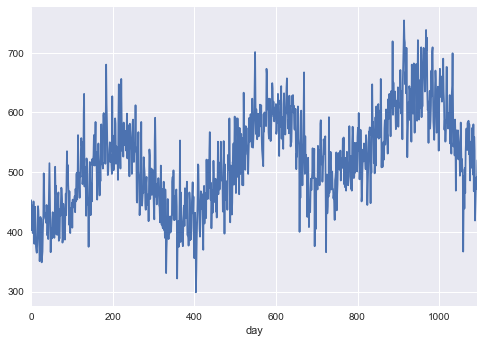

In [42]:
by_date.plot(kind='line')

In [43]:
date_df = pd.DataFrame({"day_count":by_date, "date":by_date.index })
date_df.head()

,date,day_count
day,,
0,0,453
1,1,415
2,2,403
3,3,444
4,4,398


In [44]:
model_all = sm.OLS(date_df.day_count, sm.add_constant(date_df.date))

In [45]:
results_all = model_all.fit()
print(results_all.summary())

                            OLS Regression Results                            
Dep. Variable:              day_count   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     496.2
Date:                Thu, 09 Mar 2017   Prob (F-statistic):           6.19e-91
Time:                        15:39:34   Log-Likelihood:                -6115.2
No. Observations:                1095   AIC:                         1.223e+04
Df Residuals:                    1093   BIC:                         1.224e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        446.3772      3.895    114.590      0.0

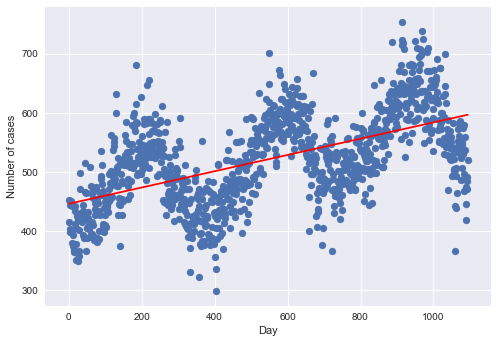

In [46]:
fig = plt.figure()
g = fig.add_subplot(111)
g.plot(date_df.date, results_all.fittedvalues, 'r')
g.scatter(date_df.date, date_df.day_count)
g.set_xlabel("Day")
g.set_ylabel("Number of cases")

In [91]:
date.loc['2016'].head()

,CATEGORY,CALL GROUPS,final_case_type,CASE DESC,occ_date,x_coordinate,y_coordinate,census_tract
occ_date,,,,,,,,
2016-01-01,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2016-01-01,7624068,710192,4200.0
2016-01-01,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2016-01-01,7629461,656559,6404.0
2016-01-01,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2016-01-01,7631377,667480,6601.0
2016-01-01,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2016-01-01,7637471,668402,6702.0
2016-01-01,STREET CRIMES,DISORDER,DISTP,DISTURBANCE - PRIORITY ...,2016-01-01,7637471,668402,6702.0


In [92]:
#grouped by date of occurrence and counted
by_day = date.groupby(['occ_date']).size()
by_day.head()

occ_date
2013-01-01    453
2013-01-02    415
2013-01-03    403
2013-01-04    444
2013-01-05    398
dtype: int64

In [93]:
#transformed into dataframe
daily_df = pd.DataFrame({"tally":by_day.values, "date":by_day.index})
daily_df.head()

,date,tally
0,2013-01-01,453
1,2013-01-02,415
2,2013-01-03,403
3,2013-01-04,444
4,2013-01-05,398


In [94]:
daily_df['time'] = pd.to_datetime(daily_df.date)

In [95]:
df_time = daily_df.set_index(daily_df.time)

In [96]:
df_time.head()

,date,tally,time
time,,,
2013-01-01,2013-01-01,453,2013-01-01
2013-01-02,2013-01-02,415,2013-01-02
2013-01-03,2013-01-03,403,2013-01-03
2013-01-04,2013-01-04,444,2013-01-04
2013-01-05,2013-01-05,398,2013-01-05


In [97]:
df_time.dtypes

date     datetime64[ns]
tally             int64
time     datetime64[ns]
dtype: object

In [98]:
df_time.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25',
               '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29',
               '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', name='time', length=1400, freq=None)

In [99]:
time = df_time.resample("W").agg(['mean', 'sum']).head()

In [100]:
#convert to time series:
ts = df_time['tally']
ts.tail(10)

time
2016-10-22    572
2016-10-23    565
2016-10-24    555
2016-10-25    552
2016-10-26    547
2016-10-27    551
2016-10-28    604
2016-10-29    642
2016-10-30    577
2016-10-31    602
Name: tally, dtype: int64

In [101]:
ts['2013-01-01']

453

In [103]:
ts['2012-03-12':'2016-10-31']

time
2013-01-01    453
2013-01-02    415
2013-01-03    403
2013-01-04    444
2013-01-05    398
2013-01-06    399
2013-01-07    451
2013-01-08    398
2013-01-09    380
2013-01-10    399
2013-01-11    442
2013-01-12    393
2013-01-13    375
2013-01-14    368
2013-01-15    365
2013-01-16    378
2013-01-17    412
2013-01-18    443
2013-01-19    435
2013-01-20    406
2013-01-21    378
2013-01-22    351
2013-01-23    364
2013-01-24    425
2013-01-25    419
2013-01-26    421
2013-01-27    349
2013-01-28    359
2013-01-29    367
2013-01-30    402
             ... 
2016-10-02    576
2016-10-03    534
2016-10-04    595
2016-10-05    560
2016-10-06    601
2016-10-07    620
2016-10-08    598
2016-10-09    551
2016-10-10    552
2016-10-11    573
2016-10-12    529
2016-10-13    527
2016-10-14    563
2016-10-15    582
2016-10-16    541
2016-10-17    521
2016-10-18    549
2016-10-19    552
2016-10-20    565
2016-10-21    622
2016-10-22    572
2016-10-23    565
2016-10-24    555
2016-10-25    552
2016-

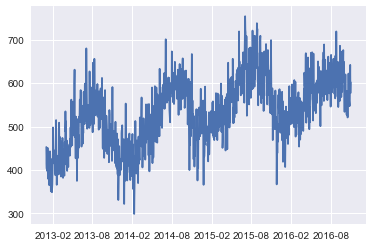

In [104]:
plt.plot(ts)

In [105]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/Users/kayla/anaconda3/envs/data-science/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/kayla/anaconda3/envs/data-science/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


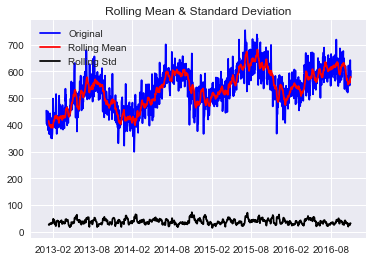

Results of Dickey-Fuller Test:
Test Statistic                   -2.358611
p-value                           0.153760
#Lags Used                       20.000000
Number of Observations Used    1379.000000
Critical Value (1%)              -3.435101
Critical Value (5%)              -2.863638
Critical Value (10%)             -2.567887
dtype: float64


In [106]:
test_stationarity(ts)

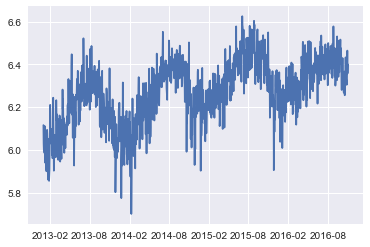

In [107]:
ts_log = np.log(ts)
plt.plot(ts_log)

/Users/kayla/anaconda3/envs/data-science/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


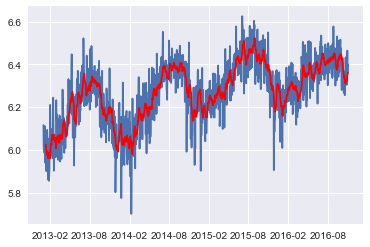

In [108]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [109]:
moving_avg.dropna()

time
2013-01-12    6.025543
2013-01-13    6.009796
2013-01-14    5.999780
2013-01-15    5.991526
2013-01-16    5.978115
2013-01-17    5.980996
2013-01-18    5.989714
2013-01-19    5.986704
2013-01-20    5.988362
2013-01-21    5.987922
2013-01-22    5.977241
2013-01-23    5.961061
2013-01-24    5.967585
2013-01-25    5.976830
2013-01-26    5.988043
2013-01-27    5.984307
2013-01-28    5.980009
2013-01-29    5.970371
2013-01-30    5.962278
2013-01-31    5.960144
2013-02-01    5.977164
2013-02-02    5.995494
2013-02-03    6.011632
2013-02-04    6.025712
2013-02-05    6.025121
2013-02-06    6.025716
2013-02-07    6.024520
2013-02-08    6.044770
2013-02-09    6.060580
2013-02-10    6.066496
                ...   
2016-10-02    6.439233
2016-10-03    6.425456
2016-10-04    6.427584
2016-10-05    6.418033
2016-10-06    6.412924
2016-10-07    6.408731
2016-10-08    6.401782
2016-10-09    6.384744
2016-10-10    6.377242
2016-10-11    6.370270
2016-10-12    6.353233
2016-10-13    6.340772
2016-1

In [110]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna()

time
2013-01-12   -0.051733
2013-01-13   -0.082870
2013-01-14   -0.091697
2013-01-15   -0.091629
2013-01-16   -0.043221
2013-01-17    0.040027
2013-01-18    0.103856
2013-01-19    0.088642
2013-01-20    0.017991
2013-01-21   -0.053028
2013-01-22   -0.116455
2013-01-23   -0.063908
2013-01-24    0.084504
2013-01-25    0.061041
2013-01-26    0.054590
2013-01-27   -0.129235
2013-01-28   -0.096687
2013-01-29   -0.065009
2013-01-30    0.034174
2013-01-31    0.089590
2013-02-01    0.233436
2013-02-02    0.159364
2013-02-03    0.042807
2013-02-04    0.040396
2013-02-05    0.019884
2013-02-06    0.019289
2013-02-07    0.003759
2013-02-08    0.053304
2013-02-09    0.012464
2013-02-10   -0.090145
                ...   
2016-10-02   -0.083125
2016-10-03   -0.145060
2016-10-04   -0.039022
2016-10-05   -0.090097
2016-10-06   -0.014329
2016-10-07    0.020989
2016-10-08   -0.008191
2016-10-09   -0.073009
2016-10-10   -0.063694
2016-10-11   -0.019384
2016-10-12   -0.082245
2016-10-13   -0.073571
2016-1

In [111]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

time
2013-01-12   -0.051733
2013-01-13   -0.082870
2013-01-14   -0.091697
2013-01-15   -0.091629
2013-01-16   -0.043221
Name: tally, dtype: float64

/Users/kayla/anaconda3/envs/data-science/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/kayla/anaconda3/envs/data-science/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


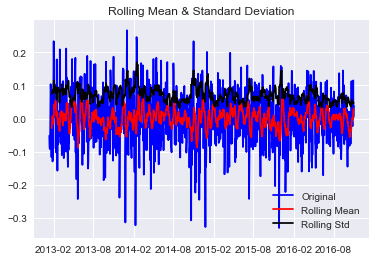

Results of Dickey-Fuller Test:
Test Statistic                -9.686957e+00
p-value                        1.163662e-16
#Lags Used                     2.200000e+01
Number of Observations Used    1.366000e+03
Critical Value (1%)           -3.435146e+00
Critical Value (5%)           -2.863658e+00
Critical Value (10%)          -2.567898e+00
dtype: float64


In [112]:
test_stationarity(ts_log_moving_avg_diff)

/Users/kayla/anaconda3/envs/data-science/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  if __name__ == '__main__':


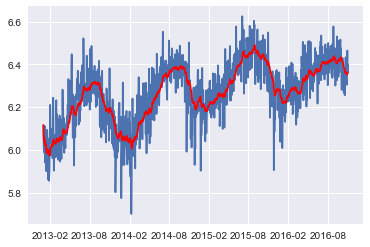

In [113]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

/Users/kayla/anaconda3/envs/data-science/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/kayla/anaconda3/envs/data-science/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


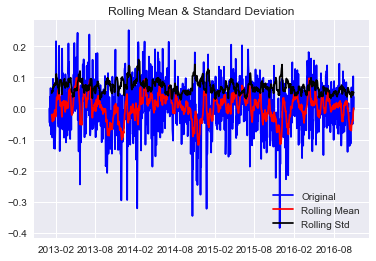

Results of Dickey-Fuller Test:
Test Statistic                -6.190193e+00
p-value                        6.149494e-08
#Lags Used                     2.200000e+01
Number of Observations Used    1.377000e+03
Critical Value (1%)           -3.435108e+00
Critical Value (5%)           -2.863641e+00
Critical Value (10%)          -2.567889e+00
dtype: float64


In [114]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

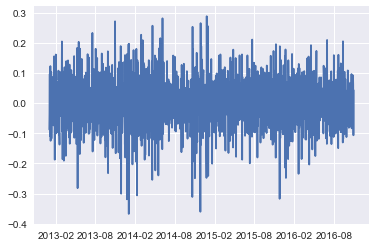

In [115]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/Users/kayla/anaconda3/envs/data-science/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/kayla/anaconda3/envs/data-science/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


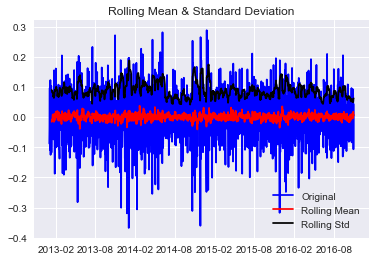

Results of Dickey-Fuller Test:
Test Statistic                -1.078910e+01
p-value                        2.156012e-19
#Lags Used                     2.100000e+01
Number of Observations Used    1.377000e+03
Critical Value (1%)           -3.435108e+00
Critical Value (5%)           -2.863641e+00
Critical Value (10%)          -2.567889e+00
dtype: float64


In [116]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [122]:
sm.tsa.stattools.acf(ts, unbiased=False, nlags=40,  qstat=False, fft=False, alpha=.05)

(array([ 1.        ,  0.8187822 ,  0.749831  ,  0.72123732,  0.70842694,
         0.71147399,  0.72547162,  0.74411752,  0.71125351,  0.67632301,
         0.67346387,  0.661785  ,  0.66926642,  0.70399264,  0.72989176,
         0.69410207,  0.64845608,  0.63979254,  0.64074915,  0.63660936,
         0.66282423,  0.69080526,  0.6564113 ,  0.62208044,  0.61705526,
         0.62272628,  0.61492975,  0.64108087,  0.67409471,  0.63912104,
         0.61138686,  0.59778515,  0.58809104,  0.58537328,  0.60849655,
         0.63605778,  0.60047836,  0.56796844,  0.55928479,  0.56126558,
         0.56430258]), array([[ 1.        ,  1.        ],
        [ 0.76639996,  0.87116444],
        [ 0.66968774,  0.82997427],
        [ 0.6237261 ,  0.81874854],
        [ 0.59723747,  0.81961642],
        [ 0.58852174,  0.83442623],
        [ 0.59169886,  0.85924438],
        [ 0.59995293,  0.88828211],
        [ 0.55690947,  0.86559755],
        [ 0.51323328,  0.83941273],
        [ 0.50285189,  0.84407585]

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: freq D not understood. Please report if you think this in error.

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [ ]:
df_time.plot()
sns.despine()
#plt.savefig('../output/images/ts-y.svg', transparent=True)

In [ ]:
time.sum

In [ ]:
time.tally.plot(label='Raw')
time.tally.rolling(7).mean().plot(label='28D MA')
time.tally.expanding().mean().plot(label='Expanding')
time.tally.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)')

plt.legend(bbox_to_anchor=(1.25, .5))
plt.tight_layout()
sns.despine()